In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, chi2_contingency
from sklearn.metrics import roc_curve, auc
from google.colab import files

In [ ]:
# Upload csv file to colab for using it
upload_file = files.upload()

Saving Thesis_Ishory_Dai_Modified.csv to Thesis_Ishory_Dai_Modified (1).csv


In [ ]:
# Use the uploaded file in colab
ruf = pd.read_csv("Thesis_Ishory_Dai_Modified.csv")
ruf.head()

,Distraction_defect_MRU,distraction_defect_RGU,PVD_MRU,RUMD_MRU,PUL_MRU,Gap_index_MRU,Surgical_Steps
0,2.60,2.70,3.40,0.69,2.38,0.94,1
1,1.90,2.16,2.15,0.93,3.11,1.12,1
2,2.24,2.88,1.95,1.40,2.46,0.89,1
3,2.89,4.59,0.90,0.95,2.07,0.90,1
4,4.95,4.60,0.80,1.39,2.79,0.56,2


In [ ]:
# View the details of the dataset to check if data contains null values
ruf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distraction_defect_MRU  20 non-null     float64
 1   distraction_defect_RGU  20 non-null     float64
 2   PVD_MRU                 20 non-null     float64
 3   RUMD_MRU                20 non-null     float64
 4   PUL_MRU                 20 non-null     float64
 5   Gap_index_MRU           20 non-null     float64
 6   Surgical_Steps          20 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 1.2 KB


In [ ]:
# View the statistical values
ruf.describe()

,Distraction_defect_MRU,distraction_defect_RGU,PVD_MRU,RUMD_MRU,PUL_MRU,Gap_index_MRU,Surgical_Steps
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,2.683000,3.093500,1.520000,0.964000,2.447500,0.942000,1.35000
std,1.130766,1.118125,0.625931,0.341289,0.609062,0.300869,0.48936
min,1.450000,1.670000,0.750000,0.500000,1.480000,0.480000,1.00000
25%,1.837500,2.245000,1.062500,0.712500,2.067500,0.727500,1.00000
50%,2.360000,2.650000,1.500000,0.915000,2.480000,0.970000,1.00000
75%,3.130000,4.125000,1.762500,1.200000,2.627500,1.152500,2.00000
max,4.950000,5.150000,3.400000,1.770000,4.340000,1.500000,2.00000


<ipython-input-64-624a41fca57d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ruf[col], fit=norm, kde=False)


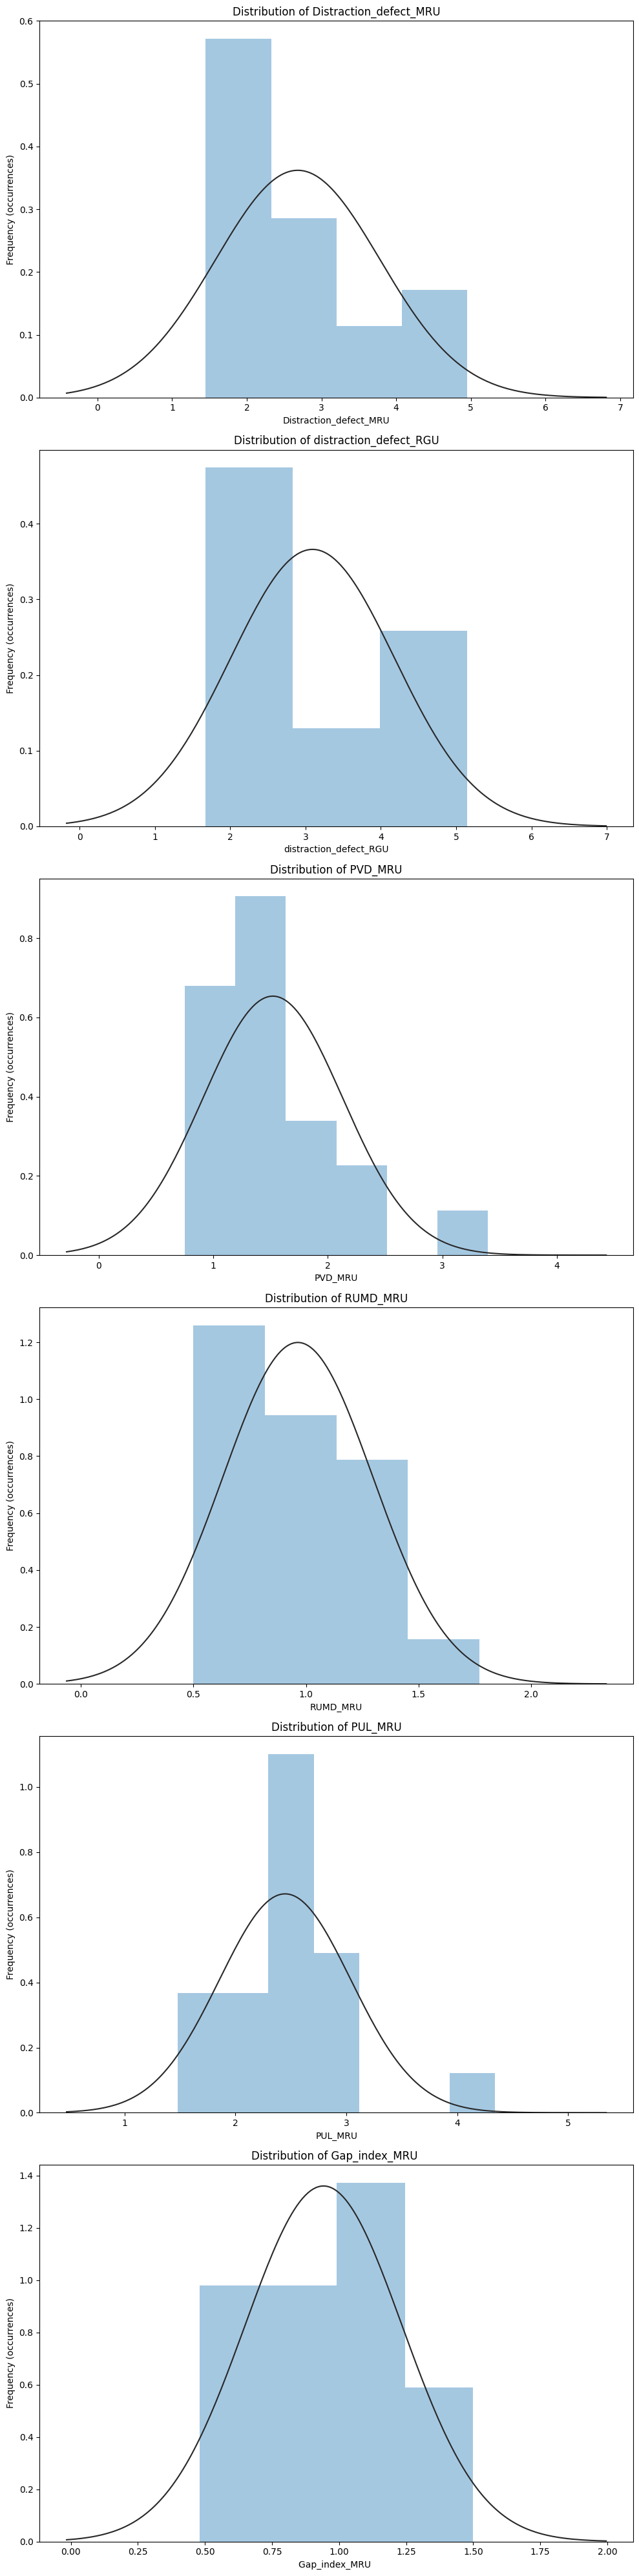

In [ ]:
# Plot distribution plots with normal distribution curve
columns_to_plot = ruf.columns[:-1]  # Exclude 'Surgical_Steps'

plt.figure(figsize=(10, 40))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)  # Create a vertical layout
    sns.distplot(ruf[col], fit=norm, kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency (occurrences)')

plt.tight_layout()
plt.show()

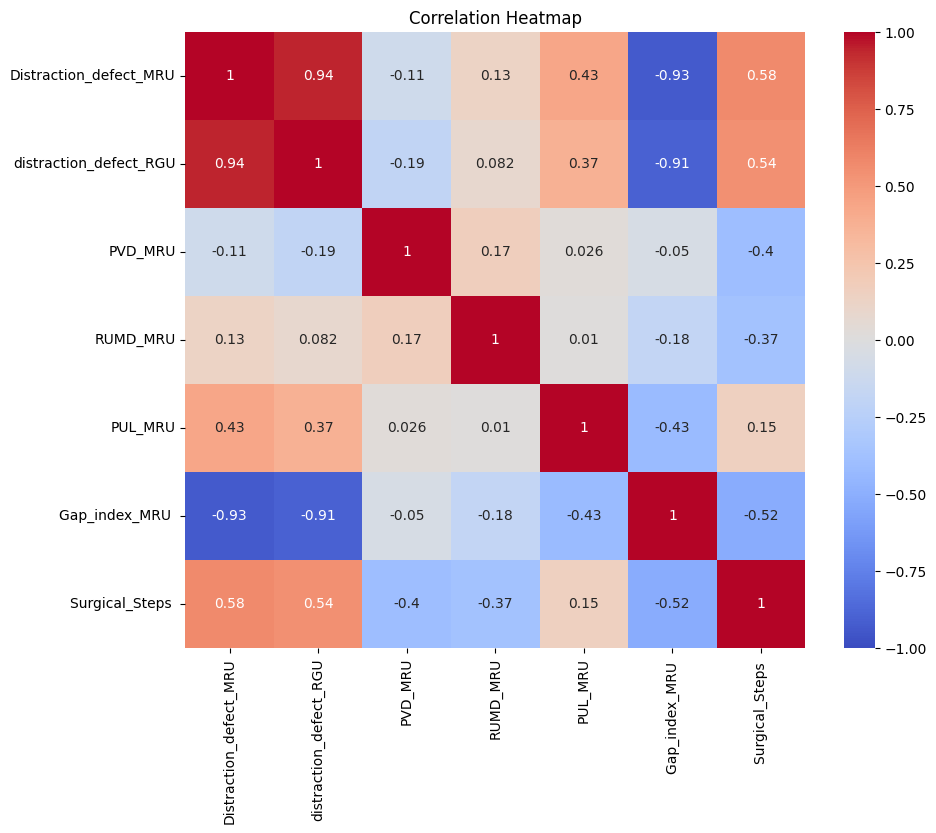

In [ ]:
# Calculate correlation matrix
correlation_matrix = ruf.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Ensure correct column name for 'Surgical_Steps'
surgical_steps_column = [col for col in ruf.columns if 'Surgical_Steps' in col][0]

# Display the correlation of each column with 'Surgical_Steps'
correlation_with_surgical_steps = correlation_matrix[surgical_steps_column].drop(surgical_steps_column)

# Create a DataFrame to display the correlation values
correlation_table = pd.DataFrame(correlation_with_surgical_steps).reset_index()
correlation_table.columns = ['Column', 'Correlation with Surgical_Steps']

# Display the correlation table
print(correlation_table)

                   Column  Correlation with Surgical_Steps
0  Distraction_defect_MRU                         0.576296
1  distraction_defect_RGU                         0.543999
2                 PVD_MRU                        -0.403793
3                RUMD_MRU                        -0.368077
4                 PUL_MRU                         0.149657
5          Gap_index_MRU                         -0.516187


In [ ]:
# Categorize each column based on mean value and perform chi-square test
chi_square_results = []
mean_comparison_results = []

for col in columns_to_plot:
    # Categorize based on mean
    mean_val = ruf[col].mean()
    ruf[f'{col}_cat'] = np.where(ruf[col] > mean_val, 'Above Mean', 'Below Mean')

    # Create contingency table
    contingency_table = pd.crosstab(ruf[f'{col}_cat'], ruf[surgical_steps_column])

    # Perform chi-square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)

    # Store the chi-square test results
    chi_square_results.append({
        'Column': col,
        'Chi2 Statistic': chi2,
        'p-value': p,
        'Degrees of Freedom': dof
    })

    # Mean comparison results
    above_mean = ruf[ruf[col] > mean_val]
    below_mean = ruf[ruf[col] <= mean_val]

    above_mean_count = len(above_mean)
    below_mean_count = len(below_mean)

    above_mean_steps = above_mean[surgical_steps_column].value_counts().to_dict()
    below_mean_steps = below_mean[surgical_steps_column].value_counts().to_dict()

    mean_comparison_results.append({
        'Column': col,
        'Mean': mean_val,
        'Above Mean Count': above_mean_count,
        'Below Mean Count': below_mean_count,
        'Above Mean Surgical Steps': above_mean_steps,
        'Below Mean Surgical Steps': below_mean_steps
    })

In [ ]:
# Convert results to DataFrame
chi_square_df = pd.DataFrame(chi_square_results)

# Display the chi-square test results
print("Chi-Square Test Results:")
print(chi_square_df)

Chi-Square Test Results:
                   Column  Chi2 Statistic   p-value  Degrees of Freedom
0  Distraction_defect_MRU        4.059896  0.043913                   1
1  distraction_defect_RGU        4.059896  0.043913                   1
2                 PVD_MRU        0.082418  0.774048                   1
3                RUMD_MRU        1.547619  0.213487                   1
4                 PUL_MRU        0.000000  1.000000                   1
5          Gap_index_MRU         0.879121  0.348443                   1


In [ ]:
# Restructure the DataFrame for better readability
structured_results = []

for row in mean_comparison_results:
    structured_results.append({
        'Column': row['Column'],
        'Mean': row['Mean'],
        'AM_Count': row['Above Mean Count'],
        'BM_Count': row['Below Mean Count'],
        'AMSS_1': row['Above Mean Surgical Steps'].get(1, 0),
        'AMSS_2': row['Above Mean Surgical Steps'].get(2, 0),
        'BMSS_1': row['Below Mean Surgical Steps'].get(1, 0),
        'BMSS_2': row['Below Mean Surgical Steps'].get(2, 0),
    })

# Convert structured results to DataFrame
structured_df = pd.DataFrame(structured_results)

# Display the restructured mean comparison results
print("Mean Comparison Results:")
print(structured_df.to_string(index=False))

Mean Comparison Results:
                Column   Mean  AM_Count  BM_Count  AMSS_1  AMSS_2  BMSS_1  BMSS_2
Distraction_defect_MRU 2.6830         7        13       2       5      11       2
distraction_defect_RGU 3.0935         7        13       2       5      11       2
               PVD_MRU 1.5200         8        12       6       2       7       5
              RUMD_MRU 0.9640         8        12       7       1       6       6
               PUL_MRU 2.4475        11         9       7       4       6       3
        Gap_index_MRU  0.9420        10        10       8       2       5       5


In [ ]:
# Define the mapping for the confusion matrix
confusion_matrix_mapping = {
    'Distraction_defect_MRU': {'TP': 'AMSS_2', 'FP': 'AMSS_1', 'TN': 'BMSS_1', 'FN': 'BMSS_2'},
    'distraction_defect_RGU': {'TP': 'AMSS_2', 'FP': 'AMSS_1', 'TN': 'BMSS_1', 'FN': 'BMSS_2'},
    'PVD_MRU': {'TP': 'BMSS_2', 'FP': 'BMSS_1', 'TN': 'AMSS_1', 'FN': 'AMSS_2'},
    'RUMD_MRU': {'TP': 'BMSS_1', 'FP': 'AMSS_2', 'TN': 'AMSS_1', 'FN': 'BMSS_2'},
    'PUL_MRU': {'TP': 'AMSS_2', 'FP': 'BMSS_2', 'TN': 'BMSS_1', 'FN': 'AMSS_1'},
    'Gap_index_MRU': {'TP': 'AMSS_1', 'FP': 'AMSS_2', 'TN': 'BMSS_2', 'FN': 'BMSS_1'},
}

In [ ]:
# Construct the confusion matrix
confusion_matrix = {}
for column, mapping in confusion_matrix_mapping.items():
    if column in structured_df['Column'].values:
        confusion_matrix[column] = {key: structured_df.loc[structured_df['Column'] == column, value].values[0]
                                    for key, value in mapping.items()}

In [ ]:
# Calculate ROC curve and sensitivity
roc_results = []

for column, values in confusion_matrix.items():
    TP, FP, TN, FN = values['TP'], values['FP'], values['TN'], values['FN']

    # Sensitivity (True Positive Rate)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Specificity (True Negative Rate)
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    roc_results.append({
        'Column': column,
        'TP': TP,
        'FP': FP,
        'TN': TN,
        'FN': FN,
        'Sensitivity': sensitivity,
        'Specificity': specificity
    })

# Convert ROC results to DataFrame
roc_df = pd.DataFrame(roc_results)

# Display the ROC results
print("ROC Results:")
print(roc_df.to_string(index=False))

ROC Results:
                Column  TP  FP  TN  FN  Sensitivity  Specificity
Distraction_defect_MRU   5   2  11   2     0.714286     0.846154
distraction_defect_RGU   5   2  11   2     0.714286     0.846154
               PVD_MRU   5   7   6   2     0.714286     0.461538
              RUMD_MRU   6   1   7   6     0.500000     0.875000
               PUL_MRU   4   3   6   7     0.363636     0.666667


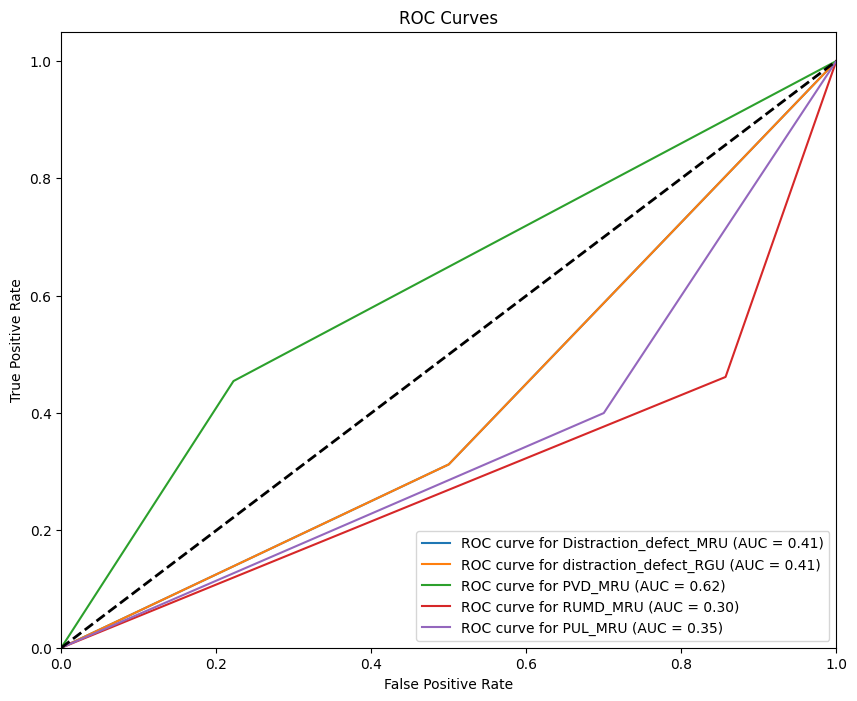

In [ ]:
# Plot ROC curves
plt.figure(figsize=(10, 8))

for row in roc_results:
    column = row['Column']
    TP, FP, TN, FN = row['TP'], row['FP'], row['TN'], row['FN']

    # Create labels and scores for ROC curve
    y_true = [1] * TP + [0] * FN + [0] * FP + [1] * TN
    y_scores = [1] * (TP + FN) + [0] * (FP + TN)

    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'ROC curve for {column} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

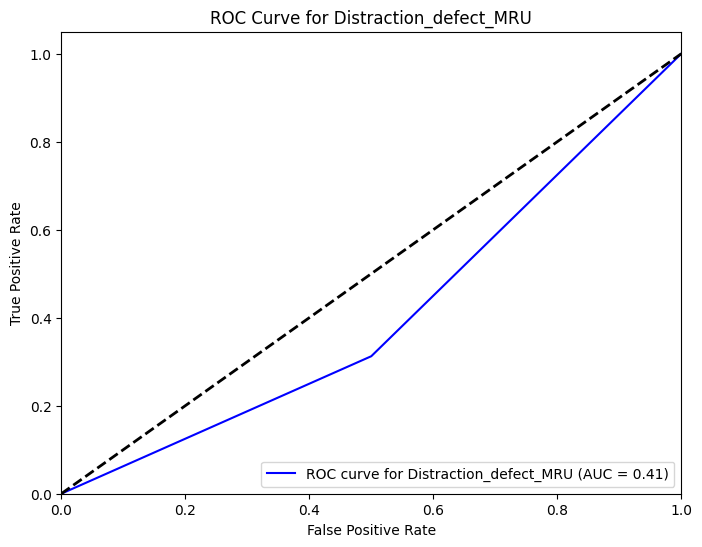

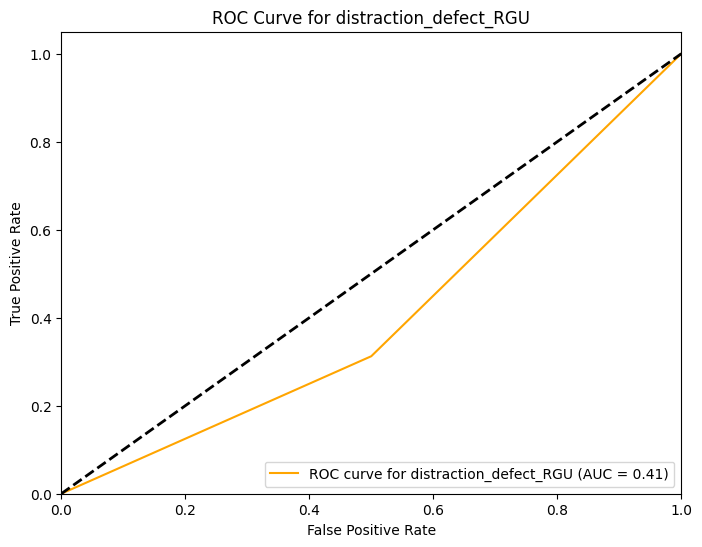

In [ ]:
# Plotting curves separately to check if curves are overlapping and not visible
# Plot ROC curve for Distraction_defect_MRU
plt.figure(figsize=(8, 6))
TP, FP, TN, FN = roc_results[0]['TP'], roc_results[0]['FP'], roc_results[0]['TN'], roc_results[0]['FN']
y_true = [1] * TP + [0] * FN + [0] * FP + [1] * TN
y_scores = [1] * (TP + FN) + [0] * (FP + TN)
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve for Distraction_defect_MRU (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Distraction_defect_MRU')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for distraction_defect_RGU
plt.figure(figsize=(8, 6))
TP, FP, TN, FN = roc_results[1]['TP'], roc_results[1]['FP'], roc_results[1]['TN'], roc_results[1]['FN']
y_true = [1] * TP + [0] * FN + [0] * FP + [1] * TN
y_scores = [1] * (TP + FN) + [0] * (FP + TN)
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='orange', label=f'ROC curve for distraction_defect_RGU (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for distraction_defect_RGU')
plt.legend(loc="lower right")
plt.show()

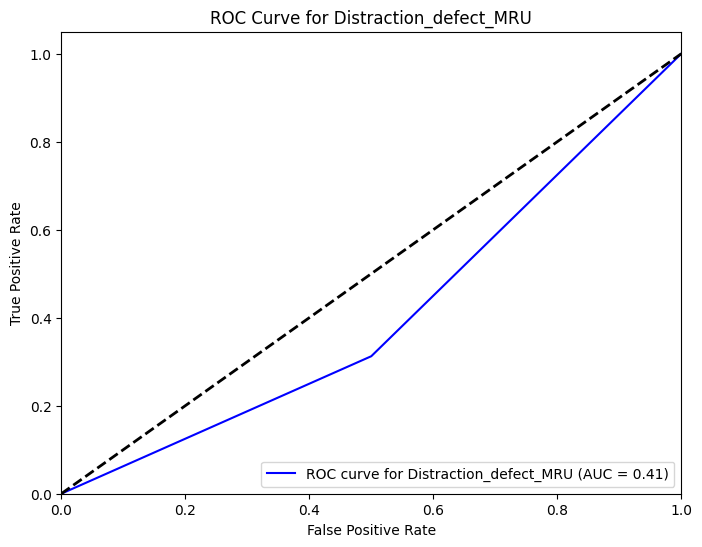

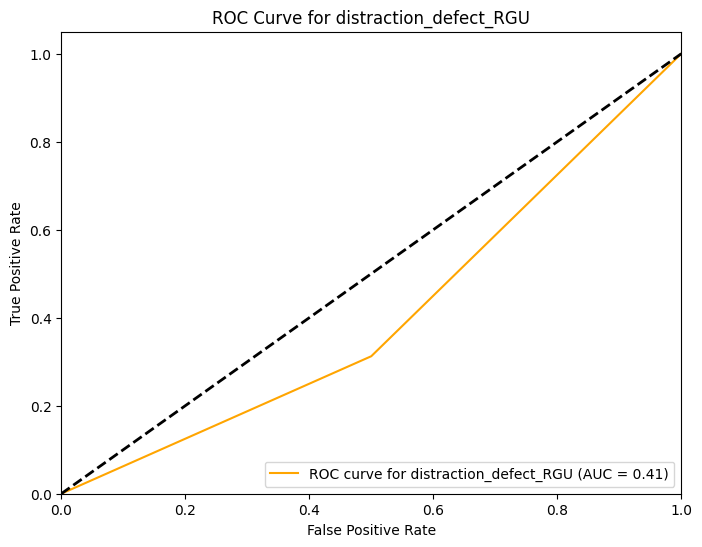

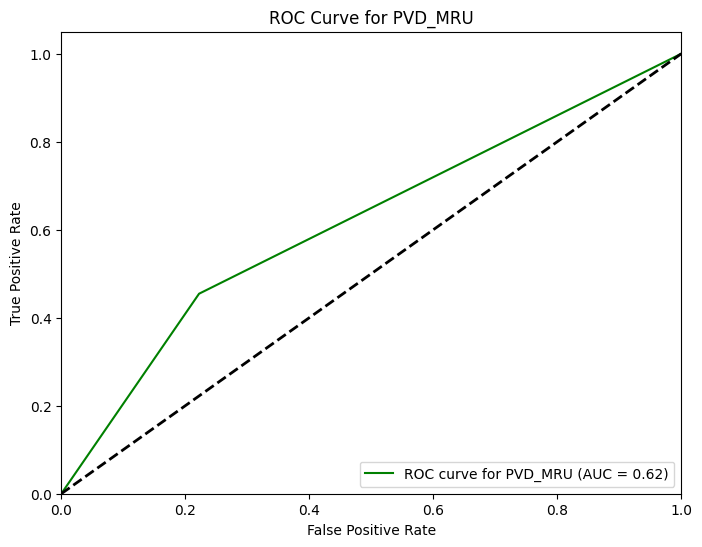

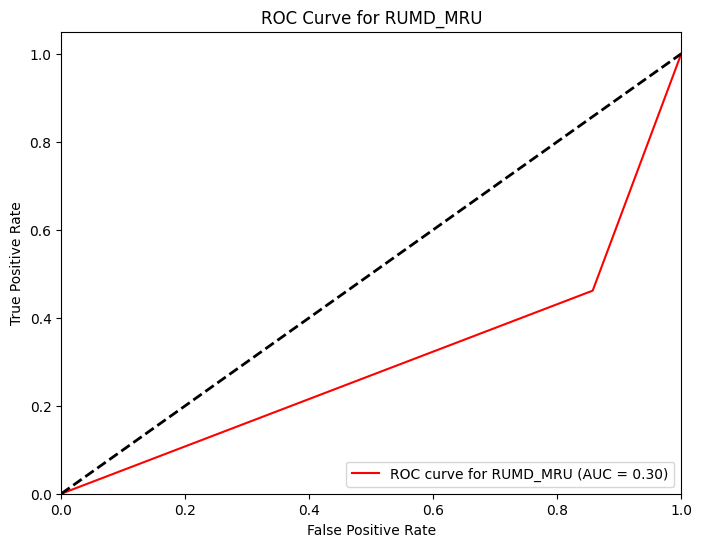

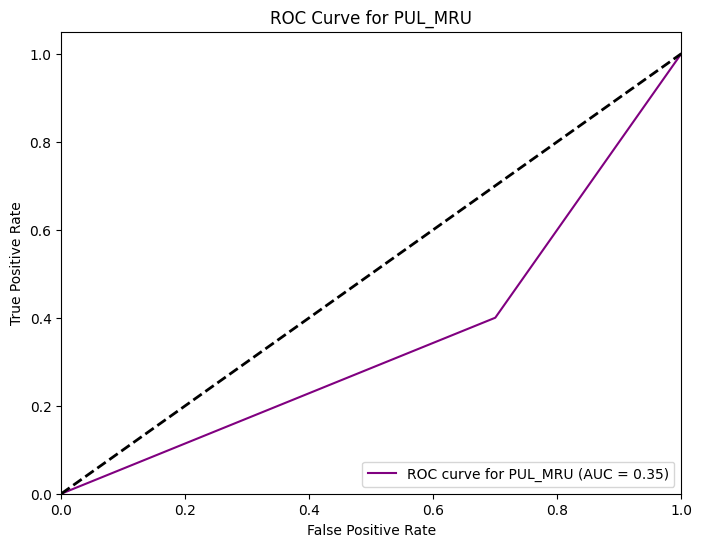

In [ ]:
# Plot ROC curve for each column
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

for i, row in enumerate(roc_results):
    column = row['Column']
    TP, FP, TN, FN = row['TP'], row['FP'], row['TN'], row['FN']

    # Create labels and scores for ROC curve
    y_true = [1] * TP + [0] * FN + [0] * FP + [1] * TN
    y_scores = [1] * (TP + FN) + [0] * (FP + TN)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for the current column
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color=colors[i % len(colors)], label=f'ROC curve for {column} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {column}')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Import the necessary library for the Mann-Whitney U test
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for each column against the 'Surgical_Steps' column
mann_whitney_results = []

for col in columns_to_plot:
    group1 = ruf[ruf[surgical_steps_column] == 1][col]
    group2 = ruf[ruf[surgical_steps_column] == 2][col]

    # Perform the Mann-Whitney U test
    stat, p_value = mannwhitneyu(group1, group2)

    # Store the results
    mann_whitney_results.append({
        'Column': col,
        'U Statistic': stat,
        'p-value': p_value
    })

# Convert results to DataFrame
mann_whitney_df = pd.DataFrame(mann_whitney_results)

# Display the Mann-Whitney U test results
print("Mann-Whitney U Test Results:")
print(mann_whitney_df.to_string(index=False))

Mann-Whitney U Test Results:
                Column  U Statistic  p-value
Distraction_defect_MRU         19.0 0.036945
distraction_defect_RGU         18.0 0.029696
               PVD_MRU         67.0 0.095467
              RUMD_MRU         68.0 0.081045
               PUL_MRU         41.5 0.781110
        Gap_index_MRU          70.0 0.055676


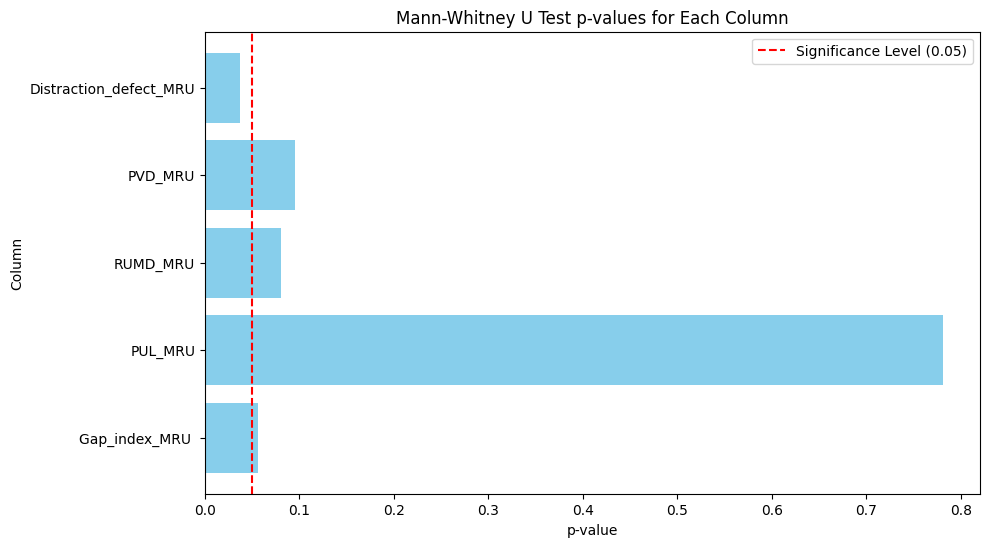

In [ ]:
# Exclude 'distraction_defect_RGU' from the plot
columns_to_plot_for_graph = [col for col in columns_to_plot if col != 'distraction_defect_RGU']
mann_whitney_df_for_graph = mann_whitney_df[mann_whitney_df['Column'].isin(columns_to_plot_for_graph)]

# Plot p-values from Mann-Whitney U test
plt.figure(figsize=(10, 6))
plt.barh(mann_whitney_df_for_graph['Column'], mann_whitney_df_for_graph['p-value'], color='skyblue')
plt.xlabel('p-value')
plt.ylabel('Column')
plt.title('Mann-Whitney U Test p-values for Each Column')
plt.axvline(x=0.05, color='r', linestyle='--', linewidth=1.5, label='Significance Level (0.05)')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# # Plot p-values from Mann-Whitney U test
# plt.figure(figsize=(10, 6))
# plt.barh(mann_whitney_df['Column'], mann_whitney_df['p-value'], color='skyblue')
# plt.xlabel('p-value')
# plt.ylabel('Column')
# plt.title('Mann-Whitney U Test p-values for Each Column')
# plt.axvline(x=0.05, color='r', linestyle='--', linewidth=1.5, label='Significance Level (0.05)')
# plt.legend()
# plt.gca().invert_yaxis()  # Invert y-axis to have higher p-values at the top
# plt.show()

In [ ]:
# Upload csv file to colab for using it
upload_file = files.upload()

Saving second_task - Sheet1.csv to second_task - Sheet1.csv


Coefficients: [1.023217]
Mean squared error: 0.028690525661956227
Coefficient of determination (R^2): 0.8578797490429413


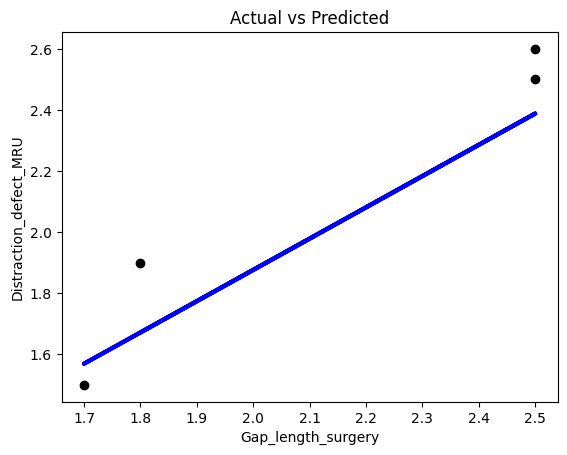

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Extract the feature (X) and target variable (y)
X = ruf2[['Gap_length_surgery']]  # feature
y = ruf2['Distraction_defect_MRU']  # target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression object
model = LinearRegression()

# Fit the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients:', model.coef_)
# The mean squared error
print('Mean squared error:', mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R^2):', r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')  # Actual data points
plt.plot(X_test, y_pred, color='blue', linewidth=3)  # Predicted values

plt.title('Actual vs Predicted')
plt.xlabel('Gap_length_surgery')
plt.ylabel('Distraction_defect_MRU')

plt.show()

In [ ]:
# Calculate Absolute Error
ruf2['Absolute_Error'] = (ruf2['Gap_length_surgery'] - ruf2['Distraction_defect_MRU']).abs()

# Calculate Relative Error
ruf2['Relative_Error'] = ruf2['Absolute_Error'] / ruf2['Gap_length_surgery']

# Calculate Error Percentage
ruf2['Error_Percentage'] = ruf2['Relative_Error'] * 100

# Display the calculated errors
print(ruf2[['Gap_length_surgery', 'Distraction_defect_MRU', 'Absolute_Error', 'Relative_Error', 'Error_Percentage']])

# Statistical summary of errors
error_summary = ruf2[['Absolute_Error', 'Relative_Error', 'Error_Percentage']].describe()
print("\nError Summary:")
print(error_summary)

    Gap_length_surgery  Distraction_defect_MRU  Absolute_Error  \
0                  2.5                    2.60            0.10   
1                  1.8                    1.90            0.10   
2                  2.3                    2.24            0.06   
3                  3.2                    2.89            0.31   
4                  4.9                    4.95            0.05   
5                  1.7                    1.84            0.14   
6                  3.9                    3.85            0.05   
7                  2.4                    2.48            0.08   
8                  1.5                    1.45            0.05   
9                  1.9                    1.83            0.07   
10                 1.8                    1.77            0.03   
11                 4.4                    4.50            0.10   
12                 2.0                    1.74            0.26   
13                 4.9                    4.86            0.04   
14        

In [ ]:
# Upload csv file to colab for using it
upload_file = files.upload()

Saving third copy.csv to third copy (1).csv


In [ ]:
# Use the uploaded file in colab
ruf3 = pd.read_csv("third copy.csv")
ruf3.head()

,Days PUC removal,SPC removal\n Day of SPC removal,\nDischarge,Surgical_Steps
0,42,56,6,1
1,42,56,8,1
2,42,56,8,1
3,42,56,4,1
4,48,70,4,2


In [ ]:
# Check column names to ensure 'Surgical_Steps' is correctly referenced
print("Columns in DataFrame:", ruf3.columns)

# Strip any leading/trailing spaces from the column names to avoid referencing issues
ruf3.columns = ruf3.columns.str.strip()

Columns in DataFrame: Index(['Days PUC removal', 'SPC removal\n Day of SPC removal', '\nDischarge',
       'Surgical_Steps '],
      dtype='object')


In [ ]:
# Separate the data based on the surgical_steps value
surgical_steps_1 = ruf3[ruf3['Surgical_Steps'] == 1]
surgical_steps_2 = ruf3[ruf3['Surgical_Steps'] == 2]

# Remove 'Surgical_Steps' column from calculation
surgical_steps_1 = surgical_steps_1.drop(columns='Surgical_Steps')
surgical_steps_2 = surgical_steps_2.drop(columns='Surgical_Steps')

# Use describe function to get statistical summary for both groups
describe_steps_1 = surgical_steps_1.describe()
describe_steps_2 = surgical_steps_2.describe()

# Display the results
print("Statistical Summary for Surgical Steps 1:")
print(describe_steps_1)

Statistical Summary for Surgical Steps 1:
       Days PUC removal  SPC removal\n Day of SPC removal  Discharge
count         13.000000                         13.000000  13.000000
mean          42.230769                         61.230769   5.615385
std            7.096406                         14.480756   1.709701
min           28.000000                         48.000000   3.000000
25%           42.000000                         56.000000   4.000000
50%           42.000000                         56.000000   5.000000
75%           42.000000                         56.000000   7.000000
max           60.000000                         98.000000   8.000000


In [ ]:
print("\nStatistical Summary for Surgical Steps 2:")
print(describe_steps_2)


Statistical Summary for Surgical Steps 2:
       Days PUC removal  SPC removal\n Day of SPC removal  Discharge
count          7.000000                          7.000000   7.000000
mean          54.857143                         72.571429  15.000000
std           11.710801                         14.316158  18.009257
min           48.000000                         56.000000   4.000000
25%           48.000000                         65.000000   4.500000
50%           48.000000                         70.000000   6.000000
75%           60.000000                         77.000000  16.000000
max           72.000000                         98.000000  54.000000
